In [1]:
import json
from utils.file_info import get_json_struct
from PIL import Image, ImageDraw,ImageFont
import os
from collections import defaultdict

from IPython.core.display import display, HTML
from io import BytesIO
import base64
import pandas as pd

In [2]:
with open('/Users/tingyu/Desktop/atk_json/valhunger_game_without_noisy.json') as f:
  valhunger_init = json.load(f)

with open('/Users/tingyu/Desktop/atk_json/valhunger_game_with_noisy.json') as f:
  valhunger_noisy = json.load(f)

In [3]:
ref_instance = '/Users/tingyu/Desktop/atk_json/instances.json'

instances = json.load(open(ref_instance))
print(get_json_struct(instances))

imgid2file = dict()
for img in instances['images']:
    imgid2file[img['id']] = img['file_name']

this.json
└── DICT
    ├── Key: info
    │   └── DICT
    │       ├── Key: description
    │       │   └── This is stable 1.0 version of the 2014 MS COCO dataset. <class 'str'>
    │       ├── Key: url
    │       │   └── http://mscoco.org <class 'str'>
    │       ├── Key: version
    │       │   └── 1.0 <class 'str'>
    │       ├── Key: year
    │       │   └── 2014 <class 'int'>
    │       ├── Key: contributor
    │       │   └── Microsoft COCO group <class 'str'>
    │       └── Key: date_created
    │           └── 2015-01-27 09:11:52.357475 <class 'str'>
    ├── Key: images
    │   └── LIST (19992 elements)
    │       └── DICT
    │           ├── Key: license
    │           │   └── 1 <class 'int'>
    │           ├── Key: file_name
    │           │   └── COCO_train2014_000000098304.jpg <class 'str'>
    │           ├── Key: coco_url
    │           │   └── http://mscoco.org/images/98304 <class 'str'>
    │           ├── Key: height
    │           │   └── 424 <class 'int'>
 

In [13]:
img_id_all = []
for img in instances['images']:
    img_id_all.append(img['id'])

In [4]:
print(get_json_struct(valhunger_noisy)),print(len(instances))
    

this.json
└── LIST (129030 elements)
    └── DICT
        ├── Key: image_id
        │   └── 580957 <class 'int'>
        ├── Key: old_caption
        │   └── [CLS] white bowl with vertical stripes [SEP] <class 'str'>
        ├── Key: new_caption
        │   └── [CLS] white bowl with vertical stripes rus [SEP] <class 'str'>
        ├── Key: topk_boxes
        │   └── LIST (10 elements)
        │       └── LIST (5 elements)
        │           └── 465.7842712402344 <class 'float'>
        ├── Key: gt_box
        │   └── LIST (4 elements)
        │       └── 468.29998779296875 <class 'float'>
        └── Key: iou
            └── 0.8782015442848206 <class 'float'>

5


(None, None)

In [12]:
def iou_diff(valhunger_init, valhunger_noisy):
    image_id_higher = []
    image_id_lower = []
    with open('/Users/tingyu/Desktop/atk_json/valhunger_game_without_noisy.json') as f:
        valhunger_init = json.load(f)
    
    with open('/Users/tingyu/Desktop/atk_json/valhunger_game_with_noisy.json') as f:
        valhunger_noisy = json.load(f)
    
    for i in range(len(valhunger_init)):
        if valhunger_init[i]['iou'] > valhunger_noisy[i]['iou']:
            image_id_lower.append({'image_id':valhunger_noisy[i]['image_id'],
                                   'old_caption':valhunger_noisy[i]['old_caption'],
                                   'new_caption':valhunger_noisy[i]['new_caption'],
                                   'topk_boxes':valhunger_noisy[i]['topk_boxes'],
                                   'gt_box':valhunger_noisy[i]['gt_box'],
                                   'iou_old':valhunger_init[i]['iou'],
                                   'iou_new':valhunger_noisy[i]['iou']})
        else: 
            image_id_higher.append({'image_id':valhunger_noisy[i]['image_id'],
                                    'old_caption':valhunger_noisy[i]['old_caption'],
                                    'new_caption':valhunger_noisy[i]['new_caption'],
                                    'topk_boxes':valhunger_noisy[i]['topk_boxes'],
                                    'gt_box':valhunger_noisy[i]['gt_box'],
                                    'iou_old':valhunger_init[i]['iou'],
                                    'iou_new':valhunger_noisy[i]['iou']})
    return image_id_lower, image_id_higher

In [13]:
image_id_lower, image_id_higher = iou_diff(valhunger_init, valhunger_noisy)

boxes

In [6]:
COCOpath = '/Users/tingyu/Downloads/train2014'
 

In [7]:
imgid2file = dict()
for img in instances['images']:
    imgid2file[img['id']] = img['file_name']

In [8]:
import random
random.seed(666)

N = 10

index_list = random.sample(range(0, len(image_id_lower)), N)


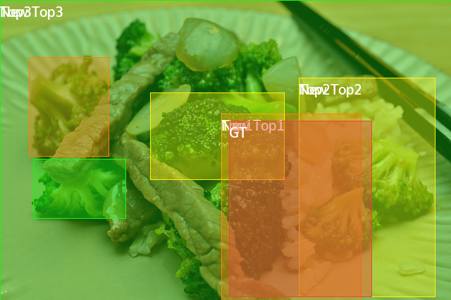


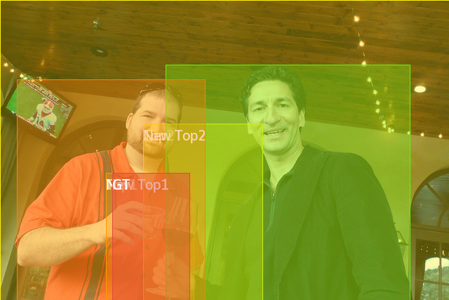


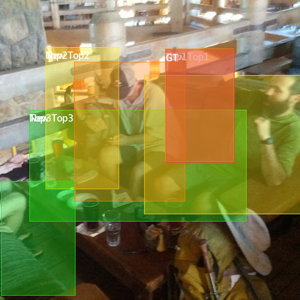


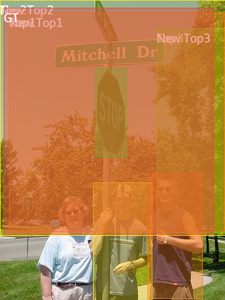


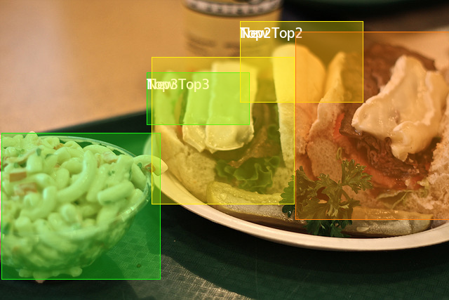


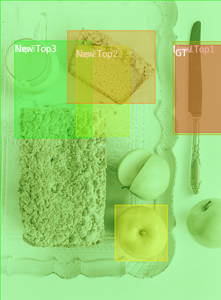


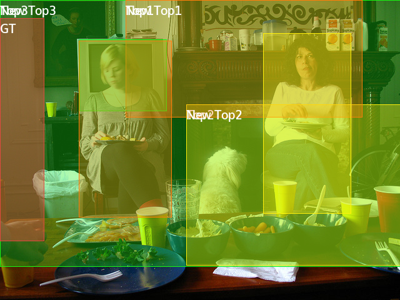


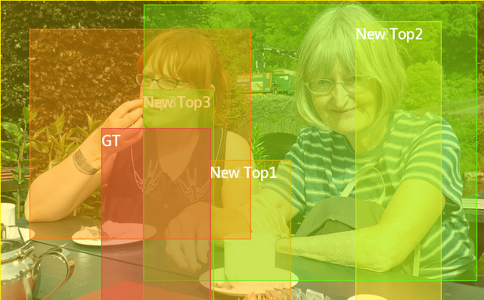


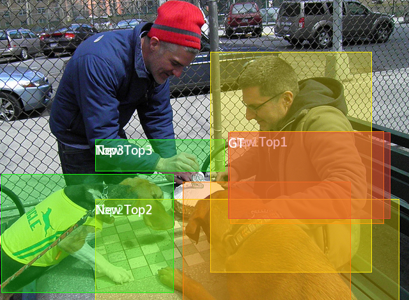


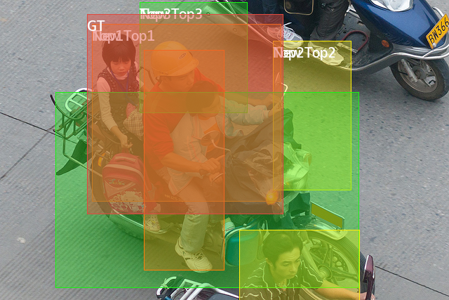

In [14]:
colormap = {
    'gt':['#e04a3f75', '#e04a3f'],
    '1':["#ff7e0b55", "#ff7e0b"],
    '2':["#ffef0b55", "#ffef0b"],
    '3':["#1af21455", "#1af214"],
    '4':["#0a5cff55", "#0a5cff"],
    '5':["#ad11ff55", "#ad11ff"],
    #'6':["#3d6ec940", "#3d6ec9"],
    #'7':["#3d6ec935", "#3d6ec9"],
    #'8':["#3d6ec930", "#3d6ec9"],
}

fnt = ImageFont.truetype("/Users/tingyu/Downloads/Oxygen-Sans-Bold.ttf", 20)

import pdfkit as pdf
import imgkit

for index in index_list:
    datum = valhunger_init[index]
    img_id = image_id_lower[index]['image_id']
    img_file = imgid2file[img_id]
    datum_lower = image_id_lower[index]
    
    img = Image.open(os.path.join(COCOpath, img_file))
    
    # draw top k
    for i in range(2, -1, -1):
        box = ImageDraw.Draw(img, 'RGBA') 
        box.rectangle(datum['topk_boxes'][i][:4], fill = colormap[str(i+1)][0], outline=colormap[str(i+1)][1]) 
        box.text(datum['topk_boxes'][i][:2], f'Top{i+1}', font=fnt)
    # draw new top k
    for i in range(2, -1, -1):
        box = ImageDraw.Draw(img, 'RGBA') 
        box.rectangle(datum_lower['topk_boxes'][i][:4], fill = colormap[str(i+1)][0], outline=colormap[str(i+1)][1]) 
        box.text(datum['topk_boxes'][i][:2], f'New Top{i+1}', font=fnt)
    # draw gt box
    gt_box = ImageDraw.Draw(img, 'RGBA')   
    gt_box.rectangle(datum['gt_box'], fill = colormap['gt'][0], outline=colormap['gt'][1]) 
    gt_box.text(datum['gt_box'][:2], f'GT', font=fnt)


    # resize to plot
    width, height = img.size 
    img = img.resize((int(width * (300/height)), 300))

    text = ''
    for k,v in datum_lower.items():
        if k != 'gt_box' and k != 'topk_boxes':
            text += f'{k}: {v}\n'

    img_buffer = BytesIO()
    img.save(img_buffer, format="PNG")
    imgStr = base64.b64encode(img_buffer.getvalue())
    
    data = pd.DataFrame({"info": [text]})
    data.loc[:,'img'] = '<img src="data:image/png;base64,{0:s}">'
    
    html_all = data.to_html(escape=False, index=False).format(imgStr.decode('ascii')).replace("\\n","<br>").replace('<td>', '<td style="text-align: left">')
    
    # imgkit.from_string(html_all, f'./ref_topk/{index}.png')
    display(HTML(html_all))

In [10]:
random.seed(666)

N = 10

index_list_high = random.sample(range(0, len(image_id_higher)), N)


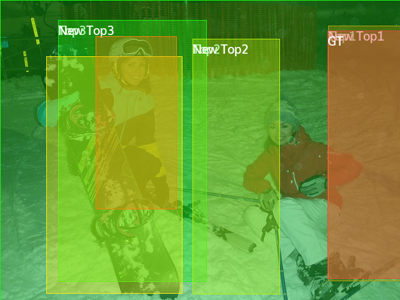


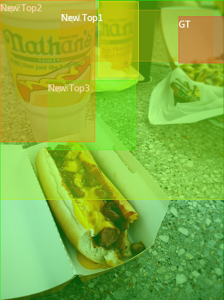


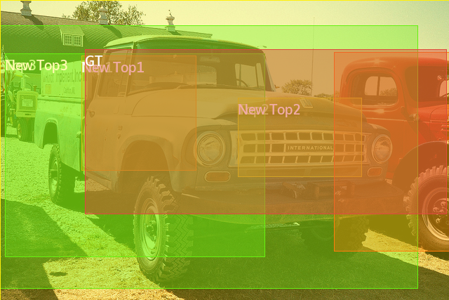


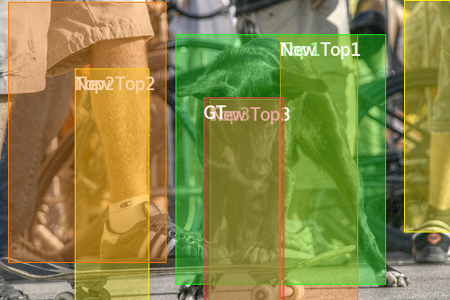


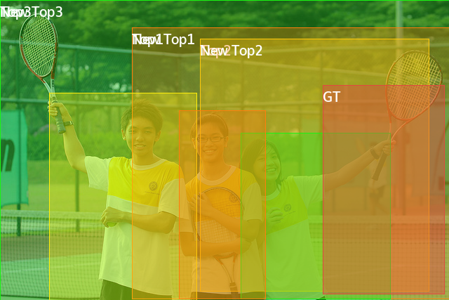


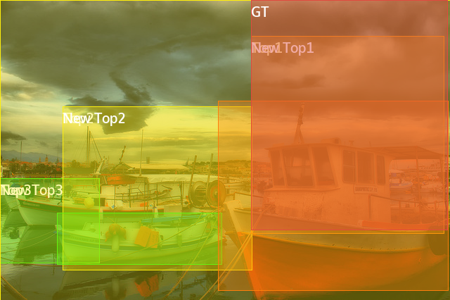


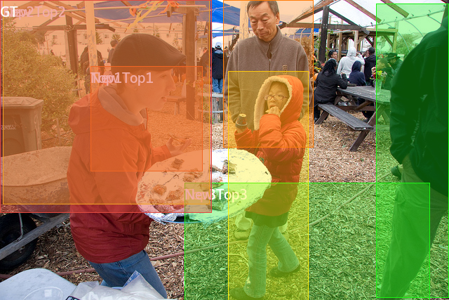


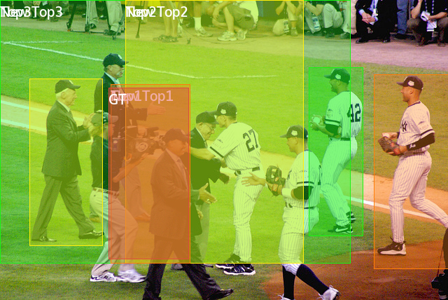


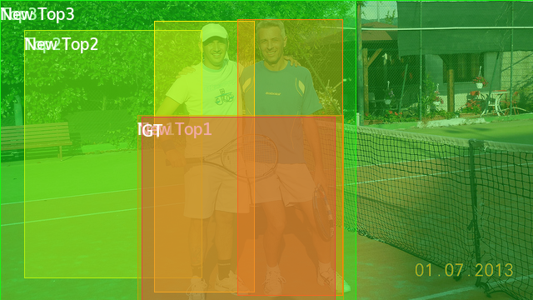


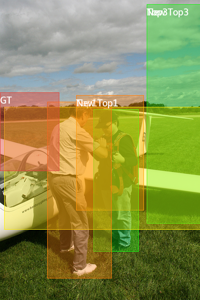

In [15]:
for index in index_list_high:
    datum = valhunger_init[index]
    img_id = image_id_higher[index]['image_id']
    img_file = imgid2file[img_id]
    datum_higher = image_id_higher[index]
    
    img = Image.open(os.path.join(COCOpath, img_file))
    
    # draw top k
    for i in range(2, -1, -1):
        box = ImageDraw.Draw(img, 'RGBA') 
        box.rectangle(datum['topk_boxes'][i][:4], fill = colormap[str(i+1)][0], outline=colormap[str(i+1)][1]) 
        box.text(datum['topk_boxes'][i][:2], f'Top{i+1}', font=fnt)
    # draw new top k
    for i in range(2, -1, -1):
        box = ImageDraw.Draw(img, 'RGBA') 
        box.rectangle(datum_higher['topk_boxes'][i][:4], fill = colormap[str(i+1)][0], outline=colormap[str(i+1)][1]) 
        box.text(datum['topk_boxes'][i][:2], f'New Top{i+1}', font=fnt)
    # draw gt box
    gt_box = ImageDraw.Draw(img, 'RGBA')   
    gt_box.rectangle(datum['gt_box'], fill = colormap['gt'][0], outline=colormap['gt'][1]) 
    gt_box.text(datum['gt_box'][:2], f'GT', font=fnt)


    # resize to plot
    width, height = img.size 
    img = img.resize((int(width * (300/height)), 300))

    text = ''
    for k,v in datum_higher.items():
        if k != 'gt_box' and k != 'topk_boxes':
            text += f'{k}: {v}\n'

    img_buffer = BytesIO()
    img.save(img_buffer, format="PNG")
    imgStr = base64.b64encode(img_buffer.getvalue())
    
    data = pd.DataFrame({"info": [text]})
    data.loc[:,'img'] = '<img src="data:image/png;base64,{0:s}">'
    
    html_all = data.to_html(escape=False, index=False).format(imgStr.decode('ascii')).replace("\\n","<br>").replace('<td>', '<td style="text-align: left">')
    
    # imgkit.from_string(html_all, f'./ref_topk/{index}.png')
    display(HTML(html_all))
